In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import linregress

In [ ]:
x1 = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1]
x2 = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
d = {'x1': x1, 'x2': x2}
df = pd.DataFrame(data=d)
df

,x1,x2
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


In [ ]:
# Para centrar en 0 y escalar usar StandarScaler de la siguiente forma:
escalar = StandardScaler()
df_escalados = escalar.fit(df)
df_escalados = escalar.transform(df)
df_escalados
df = pd.DataFrame(data = df_escalados)
df.columns = ['x1', 'x2']
df

,x1,x2
0,0.926279,0.610169
1,-1.758587,-1.506743
2,0.523549,1.232790
3,0.120819,0.361120
4,1.731739,1.357314
5,0.657792,0.983741
6,0.255062,-0.386025
7,-1.087371,-1.008646
8,-0.416154,-0.386025
9,-0.953127,-1.257695


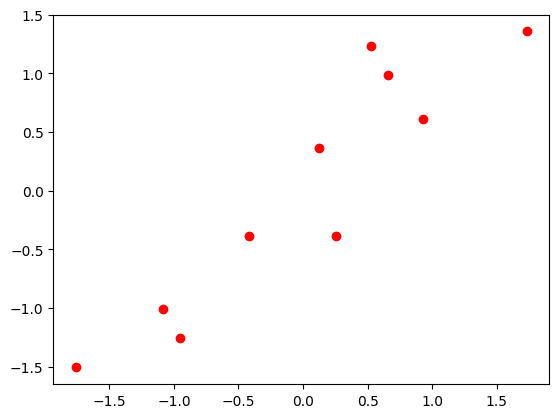

In [ ]:
plt.plot(df.x1,df.x2,'ro')
plt.show()

Con la librería PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df) # df contiene los datos escalados y centrados
print(pca.components_)
print("var explicada: ",pca.explained_variance_ratio_)
print("var explicada acumulada: ",pca.explained_variance_ratio_.cumsum())

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
var explicada:  [0.96296464 0.03703536]
var explicada acumulada:  [0.96296464 1.        ]


In [ ]:
# Convertir el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2']
)

,x1,x2
PC1,-0.707107,-0.707107
PC2,-0.707107,0.707107


In [ ]:
# Obtener las coordenadas de los datos sobre los nuevos ejes (proyecciones) usando la definición (CX.T).T
proyecciones = np.dot(pca.components_, df.T) # CX.T
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(df.index) # (CX.T).T
proyecciones

,PC1,PC2
0,-1.086432,-0.223524
1,2.308937,0.178081
2,-1.241919,0.501509
3,-0.340782,0.169919
4,-2.184290,-0.264758
5,-1.160739,0.230481
6,0.092605,-0.453317
7,1.482108,0.055667
8,0.567226,0.021305
9,1.563287,-0.215361


In [ ]:
# Obtener las proyecciones usando el método fit_transform de la librería. Da el mismo resultado
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,-1.086432,-0.223524
1,2.308937,0.178081
2,-1.241919,0.501509
3,-0.340782,0.169919
4,-2.184290,-0.264758
5,-1.160739,0.230481
6,0.092605,-0.453317
7,1.482108,0.055667
8,0.567226,0.021305
9,1.563287,-0.215361


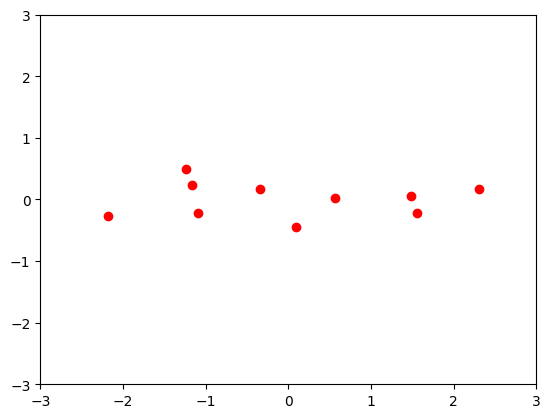

In [ ]:
plt.plot(principalDf.PC1,principalDf.PC2,'ro')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [ ]:
# En RESUMEN, para obtener los componentes y las nuevas coordenadas de los puntos se hacen sólo 5 pasos
from sklearn.decomposition import PCA # cargar la libraría
pca = PCA(n_components=2) # definir el número de componentes que al inicio es igual al número de variables
principalComponents = pca.fit_transform(df) # obtener los componentes (fit) y aplicar a los datos (transform)
# fit obtiene los nuevos ejes (componentes) y transform las nuevas coordenadas
# también se pueden aplicar por separado con pca.fit(df) y pca.transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) # renombrar las columnas por claridad
# imprimir las varianzas explicadas por los nuevos componentes, que están ordenas de mayor a menor
print("var explicada: ",pca.explained_variance_ratio_)
# y la varianza explicada acumulada, donde se ve mejor cuáles compoenentes seleccionar
print("var explicada acumulada: ",pca.explained_variance_ratio_.cumsum())
# seleccionar los componentes (nuevas variables), del PC1 en adelante, que sumen el límite de la varianza que se dese explicar (~80%)
# estos (componentes) sustituyen a las variables numéricas originales
# si se desea se pueden ver los datos con sus nuevas coordenadas
principalDf